# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



In [1]:
import pandas as pd




In [2]:
df=pd.read_csv ('calificaciones.csv')
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


In [3]:
df.shape

(100, 6)

In [4]:
df.columns

Index(['estudiante', 'Materia', 'Parcial 1', 'Parcial 2', 'Final',
       'Asistencia'],
      dtype='object')

In [5]:
df.dtypes

estudiante    object
Materia       object
Parcial 1     object
Parcial 2     object
Final         object
Asistencia    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [7]:
df.isnull().sum()

estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

pasamos los valores a enteros ignorando los NaN

In [9]:
df[['Parcial 1', 'Parcial 2', 'Final']] = df[['Parcial 1', 'Parcial 2', 'Final']].apply(pd.to_numeric, errors='coerce')


In [10]:
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95%
1,carlos lópez,fisica,6.2,7.0,NaN,88%
2,maría gómez,quimica,9.0,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6.0,7.0,75
4,laura vargas,matematicas,NaN,9.2,8.5,92%


In [11]:
df.describe()

,Parcial 1,Parcial 2,Final
count,88.000000,88.000000,85.000000
mean,7.831818,7.830682,7.894118
std,1.209877,1.182959,1.206269
min,5.500000,5.800000,5.700000
25%,6.975000,6.875000,7.000000
50%,7.900000,7.700000,7.800000
75%,8.900000,8.900000,9.000000
max,9.900000,9.900000,9.900000


In [12]:
df.isnull().sum()

estudiante     0
Materia        0
Parcial 1     12
Parcial 2     12
Final         15
Asistencia     0
dtype: int64

In [13]:
df[['Parcial 1', 'Parcial 2', 'Final']] = df[['Parcial 1', 'Parcial 2', 'Final']].fillna(df[['Parcial 1', 'Parcial 2', 'Final']].mean())


In [16]:
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.000000,7.5,9.000000,95%
1,carlos lópez,fisica,6.200000,7.0,7.894118,88%
2,maría gómez,quimica,9.000000,8.8,9.500000,100%
3,pedro rodríguez,historia,7.500000,6.0,7.000000,75
4,laura vargas,matematicas,7.831818,9.2,8.500000,92%


Limpiamos inconsistencia en los datos de la columna asistencia

In [17]:
df['Asistencia'] = df['Asistencia'].str.replace('%','', regex=False)

In [18]:
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.000000,7.5,9.000000,95
1,carlos lópez,fisica,6.200000,7.0,7.894118,88
2,maría gómez,quimica,9.000000,8.8,9.500000,100
3,pedro rodríguez,historia,7.500000,6.0,7.000000,75
4,laura vargas,matematicas,7.831818,9.2,8.500000,92


In [19]:
df.dtypes

estudiante     object
Materia        object
Parcial 1     float64
Parcial 2     float64
Final         float64
Asistencia     object
dtype: object

pasamos la columna asistencia a tipo numerico para luego validar que todos los valores esten en un rango del 0 y 100

In [20]:
df['Asistencia'] = pd.to_numeric(df['Asistencia'], errors='coerce')

In [21]:
df.dtypes

estudiante     object
Materia        object
Parcial 1     float64
Parcial 2     float64
Final         float64
Asistencia      int64
dtype: object

In [22]:
df = df[(df['Asistencia'] >= 0) & (df['Asistencia'] <= 100)]


In [23]:
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.000000,7.5,9.000000,95
1,carlos lópez,fisica,6.200000,7.0,7.894118,88
2,maría gómez,quimica,9.000000,8.8,9.500000,100
3,pedro rodríguez,historia,7.500000,6.0,7.000000,75
4,laura vargas,matematicas,7.831818,9.2,8.500000,92


In [25]:
df.shape


(95, 6)

In [26]:
df.isnull().sum()

estudiante    0
Materia       0
Parcial 1     0
Parcial 2     0
Final         0
Asistencia    0
dtype: int64

capitalizamos los nombres de estudiantes y materias

In [27]:
df['estudiante'] = df['estudiante'].str.title()
df['Materia'] = df['Materia'].str.title()
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.000000,7.5,9.000000,95
1,Carlos López,Fisica,6.200000,7.0,7.894118,88
2,María Gómez,Quimica,9.000000,8.8,9.500000,100
3,Pedro Rodríguez,Historia,7.500000,6.0,7.000000,75
4,Laura Vargas,Matematicas,7.831818,9.2,8.500000,92


In [29]:
df.describe()

,Parcial 1,Parcial 2,Final,Asistencia
count,95.000000,95.000000,95.000000,95.000000
mean,7.742967,7.752297,7.798019,87.557895
std,1.091179,1.079623,1.054839,8.203159
min,5.500000,5.800000,5.700000,70.000000
25%,7.000000,6.900000,7.050000,81.000000
50%,7.831818,7.830682,7.894118,88.000000
75%,8.650000,8.650000,8.650000,95.000000
max,9.700000,9.900000,9.700000,100.000000


calculamos el promedio de calificaciones por materia

In [30]:
prom_por_materia = df.groupby('Materia')[['Parcial 1', 'Parcial 2', 'Final']].mean()
print(prom_por_materia)


                      Parcial 1  Parcial 2     Final
Materia                                             
Ciencias Sociales      9.500000   9.100000  7.894118
Fisica                 6.573295   6.849669  6.624755
Historia               7.375000   7.026278  7.482353
Literatura Universal   8.000000   7.800000  8.200000
Matematicas            8.087636   8.261818  8.471059
Programacion Basica    7.831818   5.900000  6.300000
Quimica                9.121053   9.163158  8.845820


In [31]:
import  matplotlib.pyplot as plt

histograma de la columna final


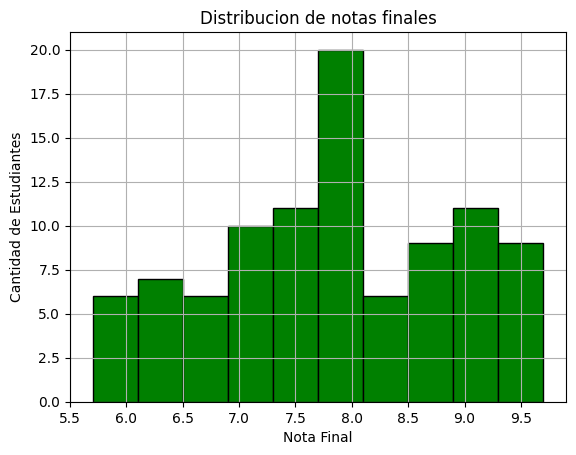

In [32]:
plt.hist(df['Final'], bins=10, color='green', edgecolor='black')
plt.title('Distribucion de notas finales')
plt.xlabel('Nota Final')
plt.ylabel('Cantidad de Estudiantes')
plt.grid(True)
plt.show()


diagrama de dispersión (scatter plot)

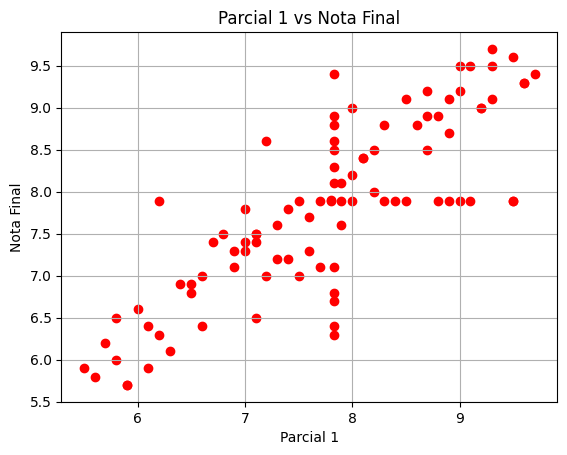

In [33]:

plt.scatter(df['Parcial 1'], df['Final'], color='red')
plt.title('Parcial 1 vs Nota Final')
plt.xlabel('Parcial 1')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()


assistencia vs nota final

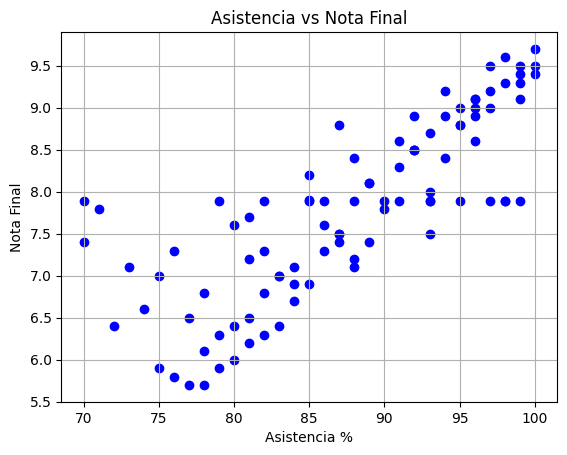

In [37]:

plt.scatter(df['Asistencia'], df['Final'], color='blue')
plt.title('Asistencia vs Nota Final')
plt.xlabel('Asistencia %')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()



Gráfico de barras del promedio de notas finales por materia

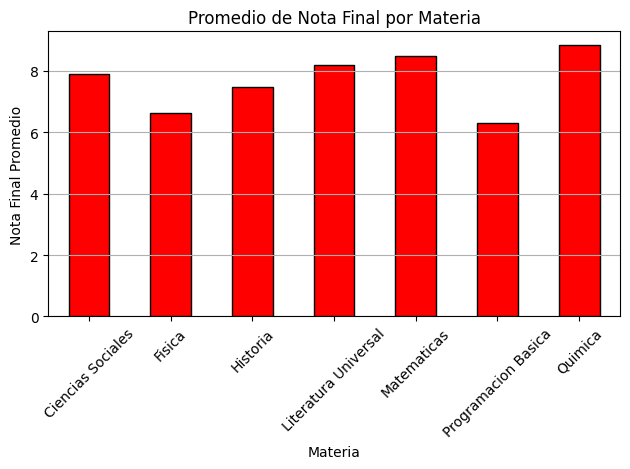

In [39]:
prom_por_materia['Final'].plot(kind='bar', color='red', edgecolor='black')
plt.title('Promedio de Nota Final por Materia')
plt.xlabel('Materia')
plt.ylabel('Nota Final Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


importamos el archivo en sqlite3

In [40]:
import sqlite3
conn = sqlite3.connect('bases_datos.db')


guardamos el dataframe en la db

In [41]:
df.to_sql('Calificaciones', conn, index=False)


95

In [45]:
verificado = pd.read_sql('SELECT * FROM calificaciones', conn)
print(verificado.head(10))


         estudiante               Materia  Parcial 1  Parcial 2     Final  \
0         Ana Pérez           Matematicas   8.000000   7.500000  9.000000   
1      Carlos López                Fisica   6.200000   7.000000  7.894118   
2       María Gómez               Quimica   9.000000   8.800000  9.500000   
3   Pedro Rodríguez              Historia   7.500000   6.000000  7.000000   
4      Laura Vargas           Matematicas   7.831818   9.200000  8.500000   
5       Javier Soto                Fisica   5.800000   6.500000  6.000000   
6        Sofia Díaz     Ciencias Sociales   9.500000   9.100000  7.894118   
7  Miguel Fernández  Literatura Universal   8.000000   7.800000  8.200000   
8    Valentina Ruiz           Matematicas   7.000000   7.830682  7.800000   
9      Diego Castro                Fisica   6.800000   7.200000  7.500000   

   Asistencia  
0          95  
1          88  
2         100  
3          75  
4          92  
5          80  
6          98  
7          85  
8       

In [46]:
conn.close()